In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import glob

In [88]:
l = [pd.read_csv(filename) for filename in sorted(glob.glob("output/centroids/*.csv"))]
dados = pd.concat(l, axis=0, sort=False)
dados['DATETIME'] =  pd.to_datetime(dados['DATETIME'], format='%Y-%m-%d %H:%M:%S')
dados = dados.set_index('DATETIME')
dados.index = dados.index.map(lambda x: x.replace(second=0))

freqtime = pd.date_range(start=dados.index.min(), end=dados.index.max(), freq='12T')
t1 = freqtime[0]
t2 = freqtime[1]
t3 = freqtime[2]

In [89]:
time1 = dados.loc[t1]
time2 = dados.loc[t2]
time3 = dados.loc[t3]

In [90]:
dataset = time1.append(time2)
dataset.head()

,N_Cluster,ID_CLUS,LAT,LON,DIST,IND_X,IND_Y,T_RELATION,RAIN_FALL,DBz
DATETIME,,,,,,,,,,
2014-09-28 19:24:00,12,0,-4.209177,-60.496387,129.979844,61,92,SW,115.717804,56.024703
2014-09-28 19:24:00,12,1,-2.268807,-60.567352,116.431544,169,88,NW,57.591373,51.176019
2014-09-28 19:24:00,12,2,-3.561566,-58.605930,160.661355,97,197,SE,40.754768,48.773155
2014-09-28 19:24:00,12,3,-2.304838,-60.315643,99.995682,167,102,NW,61.735973,51.658913
2014-09-28 19:24:00,12,4,-2.771915,-60.441680,65.067066,141,95,NW,59.813438,51.439080


In [91]:
dataset2 = time2.append(time3)
dataset2.head()

,N_Cluster,ID_CLUS,LAT,LON,DIST,IND_X,IND_Y,T_RELATION,RAIN_FALL,DBz
DATETIME,,,,,,,,,,
2014-09-28 19:36:00,11,0,-4.173204,-60.568420,130.147843,63,88,SW,112.079689,55.802731
2014-09-28 19:36:00,11,1,-2.016774,-61.232365,186.247937,183,51,NW,85.160400,53.894103
2014-09-28 19:36:00,11,2,-3.274401,-61.161720,130.752088,113,55,SW,54.635250,50.809867
2014-09-28 19:36:00,11,3,-2.304872,-60.153824,95.011285,167,111,NW,66.665298,52.192697
2014-09-28 19:36:00,11,4,-2.789865,-60.477665,66.994555,140,93,NW,31.207119,46.918359


In [126]:
X = dataset.iloc[:,[5,6]].values
X2 = dataset.iloc[:,[5,6]].values
X

array([[ 61,  92],
       [169,  88],
       [ 97, 197],
       [167, 102],
       [141,  95],
       [ 77, 167],
       [181,  54],
       [168, 113],
       [ 74, 106],
       [ 66, 126],
       [ 66,  63],
       [132,  96],
       [ 63,  88],
       [183,  51],
       [113,  55],
       [167, 111],
       [140,  93],
       [168,  84],
       [ 99, 196],
       [126,  71],
       [ 69, 158],
       [ 73, 141],
       [ 73,  95]])

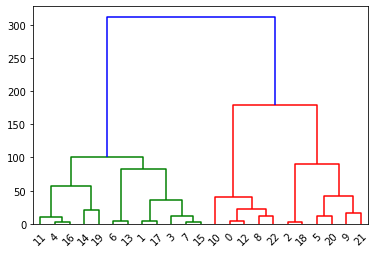

In [151]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

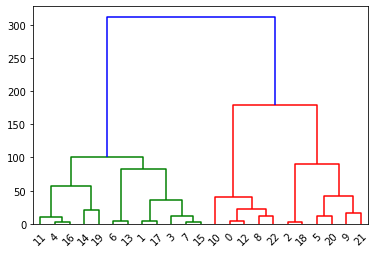

In [129]:
dendrogram = sch.dendrogram(sch.linkage(X2, method='ward'))

In [130]:
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',distance_threshold=1)
model.fit(X)
labels = model.labels_

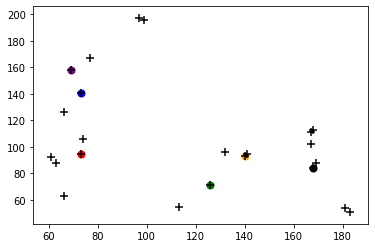

In [152]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=50, marker='o', color='black')
plt.scatter(X[:,0],X[:,1], s=50,marker='+',color='black')
# plt.scatter(time2['IND_X'],time2['IND_Y'],marker='+')
plt.show()

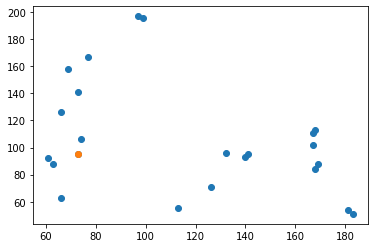

In [170]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[labels==0, 0], X[labels==0, 1])

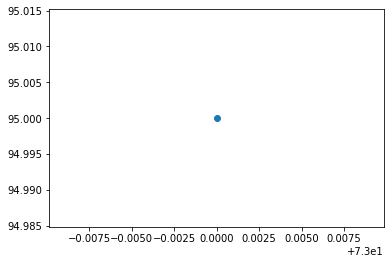

In [165]:
plt.scatter(X[labels==0, 0], X[labels==0, 1])

In [163]:
X[labels][:,0]

array([168,  99,  73, 113,  69, 183, 126,  73, 167,  63,  74, 140,  66,
        66, 132, 168, 141,  77, 181,  97, 167, 169,  61])

In [115]:
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',distance_threshold=1)
model.fit(X2)
labels = model.labels_
X2[labels==0, 0], X2[labels==0, 1]

(array([73]), array([95]))

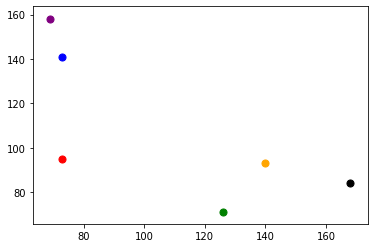

In [112]:
plt.scatter(X2[labels==0, 0], X2[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X2[labels==1, 0], X2[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X2[labels==2, 0], X2[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X2[labels==3, 0], X2[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X2[labels==4, 0], X2[labels==4, 1], s=50, marker='o', color='orange')
plt.scatter(X2[labels==5, 0], X2[labels==5, 1], s=50, marker='o', color='black')
plt.show()